# VDL Exericse 3 (Task 3.5)

**Group Name:** ...


**Participants:**

- Name 1 (Matrikl. Nr. 1)
- Name 2 (Matrikl. Nr. 2)
- ...

__Complete all sub-tasks marked with ## TODO ## and submit the filled notebook on OLAT. Using a GPU is recommended.__


In [ ]:
!pip install --upgrade torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Natural Language Processing (NLP)

**Natural language processing (NLP)** is the ability of a computer program to understand human language as it is spoken. In this exercise, we will perform a common NLP task called sentiment analysis using Recurrent Neural Networks (RNNs).

If you need a refresher on how RNNs work, the following video is recommended: https://www.youtube.com/watch?v=iX5V1WpxxkY

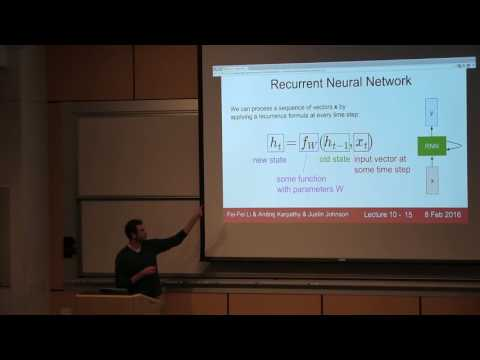

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("https://www.youtube.com/watch?v=iX5V1WpxxkY".split("=")[-1], width=800, height=600)

### Sentiment Analysis

One of the key areas where NLP has been predominantly used is Sentiment analysis. The understanding of customer behavior and needs on a company’s products and services is vital for organizations. Generally, the feedback provided by a customer on a product can be categorized into POSITIVE, NEGATIVE, and NEUTRAL. Interpreting customer feedback through product reviews helps companies evaluate how satisfied the customers are with their products/services.

#### Download Dataset

We will use the IMDB Reviews dataset for mobile electronics. The dataset is available in the `tensorflow_datasets` package. We will download it from there before using it with our PyTorch pipeline.

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np

imdb_train = tfds.load('imdb_reviews/plain_text', split='train', shuffle_files=True)
imdb_train = tfds.as_dataframe(imdb_train)
print(imdb_train.head())

imdb_train_x = np.array([s.decode('utf-8') for s in imdb_train['text'].tolist()])
imdb_train_y = imdb_train['label'].to_numpy()
print(f"imdb_reviews(split='train'): x={len(imdb_train_x)}, y={len(imdb_train_y)}")

   label                                               text
0      0  b"This was an absolutely terrible movie. Don't...
1      0  b'I have been known to fall asleep during film...
2      0  b'Mann photographs the Alberta Rocky Mountains...
3      1  b'This is the kind of film for a snowy Sunday ...
4      1  b'As others have mentioned, all the women that...
imdb_reviews(split='train'): x=25000, y=25000


In [ ]:
imdb_test = tfds.load('imdb_reviews/plain_text', split='test', shuffle_files=False)
imdb_test = tfds.as_dataframe(imdb_test)
print(imdb_test.head())

imdb_test_x = np.array([s.decode('utf-8') for s in imdb_test['text'].tolist()])
imdb_test_y = imdb_test['label'].to_numpy()
print(f"imdb_reviews(split='test'): x={len(imdb_test_x)}, y={len(imdb_test_y)}")

   label                                               text
0      1  b"There are films that make careers. For Georg...
1      1  b"A blackly comic tale of a down-trodden pries...
2      0  b'Scary Movie 1-4, Epic Movie, Date Movie, Mee...
3      0  b'Poor Shirley MacLaine tries hard to lend som...
4      1  b'As a former Erasmus student I enjoyed this f...
imdb_reviews(split='test'): x=25000, y=25000


Next step is to prepare the data for our task. In the downloaded dataset, each row has the text of the review and a five-star rating. 

Your task is to perform the following preprocessing steps:
1. Build Vocabulary
2. Create Embeddings


#### Step 1: Create Vocabulary

In the context of NLP tasks, the text corpus refers to the set of texts used for the task. In our case, the text corpus consists of all the reviews in the training data.

In [ ]:
text_corpus = ' '.join(imdb_train_x).lower()


##### TODO: Remove punctuation

Many ways of doing it: Regex, Spacy, import punctuation from string.**bold text**



We can see there are a lot of punctuation marks like fullstop(.), comma(,), new line (\n) and so on and we need to remove it. 

Here is a list of all the punctuation marks that needs to be removed 
```
(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
```


In [ ]:
import re

def remove_punctuation(text):
    punct = r"[\d!\"#\$%&\'\(\)\*\+,-.\/:;<=>\?@\[\\\]\^_`{\|}~\d+]"
    # TODO: Remove punctuation
    tmp_text = re.sub(punct, ' ', text)
    text = ' '.join(re.split('\W+', tmp_text))

    return text

##### Remove stopwords

Stop words are common words like ‘the’, ‘and’, ‘I’, etc. that are very frequent in text, and so don’t convey insights into the specific topic of a document. We can remove these stop words from the text in a given corpus to clean up the data, and identify words that are more rare and potentially more relevant to what we’re interested in.

_Hint: See nltk.corpus.stopwords('english') in https://www.nltk.org/search.html?q=stopwords_

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    # TODO: Remove stopwords
    stop_words = stopwords.words('english')
    #add some custom stopwords to stopword list
    additional_stopwords= ["href", "br","fr"]
    stop_words.extend(additional_stopwords)
    #remove the stopwords
    text_temp = set(text.lower().split(" ")) - set(stop_words)
    text = " ".join(text_temp)
    text = ' '.join(text.split())
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def cleanup(text):
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text

text_corpus_clean = cleanup(text_corpus)

##### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize(text):
    words = word_tokenize(text)
    return sorted(words)

words = tokenize(text_corpus_clean)
print("{} words in vocabulary ({} unique)".format(len(words), len(set(words))))
words[:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


73381 words in vocabulary (73374 unique)


['aa', 'aaa', 'aaaaaaah', 'aaaaah', 'aaaaatch']

In [ ]:
from collections import Counter

frequency = Counter(words)
for word in words:  # remove words that only occur once (probably typos)
    if frequency[word] == 1:
        words.remove(word)

print("{} words in updated vocabulary ({} unique)".format(len(words), len(set(words))))
words[:5]

36695 words in updated vocabulary (36688 unique)


['aaa', 'aaaaah', 'aaaahhhhhhh', 'aaaarrgh', 'aaargh']

In [ ]:
vocab = sorted(list(set(words)))
print(len(vocab))
vocab[:5]

36688


['aaa', 'aaaaah', 'aaaahhhhhhh', 'aaaarrgh', 'aaargh']

#### Task 3: Compute word embeddings
The task is to map every word to an integer value and then vice-versa. 



Next step is to create a vocabulary. This way every word is mapped to an integer number.
```
Example: 1: hello, 2: I, 3: am, 4: Robo and so on...
```


In [ ]:
def vocabulary_to_integer(vocab):
    """ Maps each vocab word to an integer.
    Indexing starts with 1 as '0' is reserved for padding.

    Args:
        vocab (list): A list of unique words in vocabulary.
    Returns:
        dict: key-value pairs of words and corresponding int ids
    """
    vocab_to_int = dict()
    # TODO: Implement the method
    idx = 1
    vocab_to_int = {}

    for word in vocab:
      if word not in vocab_to_int:
         vocab_to_int[word] = idx
         idx += 1
    
    return vocab_to_int

vocab_to_int = vocabulary_to_integer(vocab)
print(len(vocab_to_int))
len(vocab)

36688


36688

Let's see what positve words in positive reviews we have and what we have in negative reviews. 

In [ ]:
positive_counts = Counter()
negative_counts = Counter()

In [ ]:
for review, label in zip(imdb_train_x, imdb_train_y):
    review = remove_stopwords(remove_punctuation(review))
    if label == 1:
        for word in review.split(" "):
              positive_counts[word] += 1
    else:
        for word in review.split(" "):
              negative_counts[word] += 1

In [ ]:
positive_counts.most_common()[:10]

[('one', 7141),
 ('film', 7093),
 ('movie', 7039),
 ('like', 5396),
 ('good', 4780),
 ('time', 4372),
 ('well', 4323),
 ('great', 4224),
 ('see', 4201),
 ('story', 4189)]

In [ ]:
negative_counts.most_common()[:10]

[('movie', 8272),
 ('one', 7024),
 ('film', 6850),
 ('like', 6281),
 ('even', 4941),
 ('good', 4861),
 ('would', 4480),
 ('bad', 4406),
 ('time', 4362),
 ('really', 4053)]

The above is just to show the most common words in the positive and negative sentences. However, there are a lot of unnecessary words like `the`, `a`, `was`, and so on. Can you find a way to show the relevant words and not these words? 

```
Hint: Stop Words removal or normalizing each term.
```

In [ ]:
#vocab_to_int['recommended']

In [ ]:
imdb_train_x_embed = []
for x in imdb_train_x:
    x = cleanup(x.lower())
    temp = []
    for word in x.split(" "):
      try:
          temp.append(vocab_to_int[word])
      except KeyError: # this can happen because we removed stopwords
          pass # ignore this
    imdb_train_x_embed.append(temp)
print(len(imdb_train_x), len(imdb_train_x_embed))

25000 25000


In [ ]:
# This step is to see if any review is empty and we remove it. Otherwise the input will be all zeroes.
review_lens = Counter([len(x) for x in imdb_train_x_embed])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 0
Maximum review length: 286


In [ ]:
# Remove any reviews/labels with zero length from the list
print('Number of reviews before removing outliers: ', len(imdb_train_x_embed))
non_zero_idx = [ii for ii, review in enumerate(imdb_train_x_embed) if len(review) != 0]
imdb_train_x_embed = [imdb_train_x_embed[ii] for ii in non_zero_idx]
imdb_train_y = np.array([imdb_train_y[ii] for ii in non_zero_idx])
print('Number of reviews after removing outliers: ', len(imdb_train_x_embed))
print('Number of labels after removing outliers: ', len(imdb_train_y))

Number of reviews before removing outliers:  25000
Number of reviews after removing outliers:  25000
Number of labels after removing outliers:  25000


#### Task 4: Data padding

> Define a function that returns an array `features` that contains the padded data, of a standard size, that we'll pass to the network. 
* The data should come from `review_ints`, since we want to feed integers to the network. 
* Each row should be `seq_length` elements long. 
* For reviews shorter than `seq_length` words, **left pad** with 0s. That is, if the review is `['best', 'movie', 'ever']`, `[117, 18, 128]` as integers, the row will look like `[0, 0, 0, ..., 0, 117, 18, 128]`. 
* For reviews longer than `seq_length`, use only the first `seq_length` words as the feature vector.

As a small example, if the `seq_length=10` and an input review is: 
```
[117, 18, 128]
```
The resultant, padded sequence should be: 

```
[0, 0, 0, 0, 0, 0, 0, 117, 18, 128]
```

**Your final `features` array should be a 2D array, with as many rows as there are reviews, and as many columns as the specified `seq_length`.**

In [ ]:
def pad_features(reviews_ints, seq_length):
    features = []
    # TODO: Write the logic for padding the data
    features = np.zeros((len(reviews_ints), seq_length),dtype=int)
    for ii, review in enumerate(reviews_ints):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_length]
        
    return np.array(features)

In [ ]:
seq_length = 200
features = pad_features(imdb_train_x_embed, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(imdb_train_x_embed), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features[:30,:10])

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Now we have everything ready. It's time to split our dataset into `Train`, `Test` and `Validate`. 

Read more about the train-test-split here : https://cs230-stanford.github.io/train-dev-test-split.html


#### Task 5: Create train/test splits

Lets create train, test and val split in the ratio of 8:1:1.  

Hint: Either use shuffle and slicing in Python or use train-test-val split in Sklearn. 

In [ ]:
from sklearn.model_selection import train_test_split

train_frac = 0.8
val_frac = 0.1
test_frac = 0.1

def train_test_val_split(features):
    val_test_x, train_x = train_test_split(features, test_size=train_frac, shuffle=False)
    val_x, test_x = train_test_split(val_test_x, test_size=test_frac / (val_frac+test_frac), shuffle=False)
    return train_x, val_x, test_x

def train_test_val_labels(encoded_labels):
    val_test_y, train_y = train_test_split(encoded_labels, test_size=train_frac, shuffle=False)
    val_y, test_y = train_test_split(val_test_y, test_size=test_frac / (val_frac+test_frac), shuffle=False)
    return train_y, val_y, test_y

train_x, val_x, test_x = train_test_val_split(features)
train_y, val_y, test_y = train_test_val_labels(imdb_train_y)

In [ ]:
## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		(2500, 200)


#### Create data loaders

After creating training, test, and validation data, we can create DataLoaders for this data by following two steps:
1. Create a known format for accessing our data, using [TensorDataset](https://pytorch.org/docs/stable/data.html#) which takes in an input set of data and a target set of data with the same first dimension, and creates a dataset.
2. Create DataLoaders and batch our training, validation, and test Tensor datasets.

```
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
train_loader = DataLoader(train_data, batch_size=batch_size)
```

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets for train, test and val
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 64

# make sure to SHUFFLE your training data. Keep Shuffle=True.
train_loader = DataLoader(train_data, batch_size=batch_size, drop_last=True, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, drop_last=True)

In [ ]:
# obtain one batch of training data and label. 
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([64, 200])
Sample input: 
 tensor([[    0,     0,     0,  ..., 30898, 13369, 14928],
        [    0,     0,     0,  ..., 20962,  5237, 11707],
        [    0,     0,     0,  ...,  4826, 11707,  7760],
        ...,
        [    0,     0,     0,  ...,  8216,  5237, 18152],
        [    0,     0,     0,  ..., 28606, 30146, 14898],
        [    0,     0,     0,  ..., 18428, 30227, 22858]])

Sample label size:  torch.Size([64])
Sample label: 
 tensor([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])


In [ ]:
# Check if GPU is available.
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


#### Create the Network

Here we are creating a simple RNN in PyTorch and pass the output to the a Linear layer and Sigmoid at the end to get the probability score and prediction as POSITIVE or NEGATIVE. 

The network is very similar to the CNN network created in Exercise 2. 

More info available at: https://pytorch.org/docs/0.3.1/nn.html?highlight=rnn#torch.nn.RNN

Read about the parameters that the RNN takes and see what will happen when `batch_first` is set as `True`.

##### RNN

In [ ]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # RNN layer
        self.rnn = nn.RNN(vocab_size, hidden_dim, n_layers, 
                          dropout=drop_prob, batch_first=True)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # RNN out layer
        rnn_out, hidden = self.rnn(x, hidden)
    
        # stack up lstm outputs
        rnn_out = rnn_out.view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(rnn_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

    

Given a batch of 64 and input size as 1 and a sequence length of 200 to a RNN with 2 stacked layers and 512 hidden layers, find the shape of input data (x) and the hidden dimension (hidden) specified in the forward pass of the network. Note, the `batch_first` is kept to be `True`. 

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1 # +1 for the 0 padding + our word tokens
output_size = 1
hidden_dim = 512
n_layers = 2

net = SentimentRNN(vocab_size, output_size, hidden_dim, n_layers)
print(net)

SentimentRNN(
  (rnn): RNN(36689, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)


##### Task 6: LSTM 

Before we start creating the LSTM, it is important to understand LSTM and to know why we prefer LSTM over a Vanilla RNN for this task. 
> Here are some good links to know about LSTM:
* [Colah Blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* [Understanding LSTM](http://blog.echen.me/2017/05/30/exploring-lstms/)
* [RNN effectiveness](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)


Now create a class named SentimentLSTM with `n_layers=2`, and rest all hyperparameters same as before. Also, create an embedding layer and feed the output of the embedding layer as input to the LSTM model. Dont forget to add a regularizer (dropout) layer after the LSTM layer with p=0.4 to prevent overfitting. 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentLSTM(nn.Module):
    """
    The LSTM model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.4):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentLSTM, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # TODO: We need to get word embeddings before passing them to the LSTM
        self.embedding =  nn.Embedding(vocab_size,embedding_dim) 
        
        # TODO: The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim,hidden_dim,n_layers, dropout=drop_prob, batch_first = True)

        # The dropout layer regularizes our network
        self.dropout = nn.Dropout(drop_prob)

        # The linear layer that maps from hidden state space to tag space
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        n = x.size(0)
        x = x.long()

        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(n, -1)[:,-1]
        return out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

Here, we'll instantiate the network. First up, defining the hyperparameters.

* `vocab_size`: Size of our vocabulary or the range of values for our input, word tokens.
* `output_size`: Size of our desired output; the number of class scores we want to output (pos/neg).
* `embedding_dim`: Number of columns in the embedding lookup table; size of our embeddings.
* `hidden_dim`: Number of units in the hidden layers of our LSTM cells. Usually larger is better performance wise. Common values are 128, 256, 512, etc.
* `n_layers`: Number of LSTM layers in the network. Typically between 1-3

In [ ]:
# Instantiate the model with these hyperparameters
vocab_size = len(vocab_to_int) + 1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 200
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(36689, 200)
  (lstm): LSTM(200, 256, num_layers=2, batch_first=True, dropout=0.4)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


#### Train the Network

##### Task 7: Define loss functions
We are using `BCELoss (Binary Cross Entropy Loss)` since we have two output classes. 

**Can Cross Entropy Loss be used instead of BCELoss? If no, why not? If yes, how?**

**Is `NLLLoss()` and last layer as `LogSoftmax()` is same as using `CrossEntropyLoss()` with a Softmax final layer? Can you get the mathematical intuition behind it?**

In [ ]:
# Create loss function
criterion = nn.BCELoss()

# Create optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

##### Perform training and validation

In [ ]:
epochs = 5 
clip = 5 # gradient clipping

# move model to GPU, if available
if train_on_gpu:
    net.cuda()

train_losses = []
val_losses = []
for e in range(epochs):
    # Training loop
    h = net.init_hidden(batch_size)  # initialize hidden state
    net.train()
    loss_tr = None
    for inputs, labels in train_loader:  # batch loop
        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # Training step
        net.zero_grad()                                     # zero accumulated gradients
        output, h = net(inputs, h)                          # forward pass
        loss = criterion(output.squeeze(), labels.float())  # compute loss
        loss.backward()                                     # backward pass
        loss_tr = loss if loss_tr is None else loss_tr+loss # accumulate loss
        nn.utils.clip_grad_norm_(net.parameters(), clip)    # `clip_grad_norm` helps
                                                            # prevent exploding gradients
        optimizer.step()                                    # update weights
    loss_tr /= len(train_loader)
    train_losses.append(loss_tr.item())

    # Validation loop
    val_h = net.init_hidden(batch_size)
    net.eval()
    loss_va = None
    for inputs, labels in valid_loader:
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        val_h = tuple([each.data for each in val_h])

        # Validation step
        output, val_h = net(inputs, val_h)                  # forward pass
        loss = criterion(output.squeeze(), labels.float())  # compute loss
        loss_va = loss if loss_va is None else loss_va+loss # accumulate loss
    loss_va /= len(valid_loader)
    val_losses.append(loss_va.item())

    print("\r", "epoch: {}\t".format(e+1),
          "loss_tr: {:.6f}...".format(loss_tr.item()),
          "loss_va: {:.6f}".format(np.mean(loss_va.item())), end='')

 epoch: 5	 loss_tr: 0.186128... loss_va: 0.477882

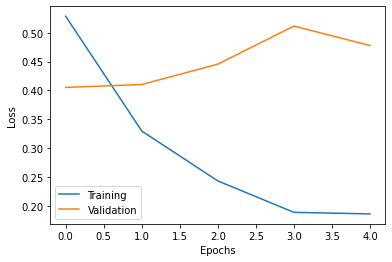

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(range(len(train_losses)), train_losses, label='Training')
plt.plot(range(len(val_losses)), val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Inference
Once we are done with training and validating, we can improve training loss and validation loss by playing around with the hyperparameters. Can you find a better set of hyperparams? Play around with it. 

##### Task 10: Prediction Function

Now write a prediction function to predict the output for the test set created. Save the results in a CSV file with one column as the reviews and the prediction in the next column. Calculate the accuracy of the test set (i.e., percentage of correct predictions).

In [ ]:
import csv

def to_sentences(input):
    sentences=[]
    for batch_instance in range(0, 64):
        sentence=""
        for id in input[batch_instance]:
            if(id==0):
                continue

            sentence = sentence + str(vocab[id]) + ' '
        sentences.append(sentence)

    return np.array(sentences)


def predict():
    val_h = net.init_hidden(batch_size)
    net.eval()
    loss_va = None
    test_acc = 0
    all_labels_preds = [[],[]]
    for inputs, labels in test_loader:
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        val_h = tuple([each.data for each in val_h])

        # Validation step
        output, val_h = net(inputs, val_h)                  # forward pass
        test_acc += torch.sum(labels == (output>0.5))
        all_labels_preds[0] += labels.tolist()
        all_labels_preds[1] += (output>0.5).tolist()
        loss = criterion(output.squeeze(), labels.float())  # compute loss
        loss_va = loss if loss_va is None else loss_va+loss # accumulate loss
    loss_va /= len(test_loader)
    val_losses.append(loss_va.item())
    print(f'Train:\t Accuracy {test_acc/len(test_loader):.2f} %\t' + "loss_tr: {:.6f}...".format(loss_tr.item()),
          "loss_va: {:.6f}".format(np.mean(loss_va.item())), end='')
    test_df = pd.DataFrame(np.array(all_labels_preds).T, columns= ['labels', 'predictions'])
    test_df.to_csv('test_labels_predictions.csv') # uncomment to save as csv
predict()

Train:	 Accuracy 51.31 %	loss_tr: 0.186128... loss_va: 0.516068